Introduction
------------

The aim of this exercise is to obtain familiarity with NESTML by completing a partial model of the Izhikevich neuron [1]. In the file `izhikevich_task.nestml`, a subset of the parameters, state equations and update block is implemented. Your task is to complete the model code. For reference, the solution is included as `izhikevich_solution.nestml`.


NESTML code generation
----------------------

Our NESTML model is stored at `HPAC_Training/NESTML/izhikevich_solution.nestml`. To generate code, build the module and load the module into the NEST Simulator:


In [2]:
from pynestml.frontend.pynestml_frontend import to_nest, install_nest
to_nest(input_path="HPAC_Training/NESTML/izhikevich_solution.nestml", target_path="nestml-tutorial-generated", logging_level="INFO")

[1,GLOBAL, INFO]: No module name specified; the generated module will be named "nestmlmodule"
[2,GLOBAL, INFO]: Start processing '/users/course81/HPAC_Training/NESTML/izhikevich_solution.nestml'!
[3,izhikevich_tutorial, INFO, [1:0;42:0]]: Start building symbol table!
[4,izhikevich_tutorial, WARNING, [5:4;5:13]]: Variable 'u' has the same name as a physical unit!
[5,izhikevich_tutorial, WARNING, [14:4;14:13]]: Variable 'a' has the same name as a physical unit!
[6,izhikevich_tutorial, WARNING, [15:4;15:13]]: Variable 'b' has the same name as a physical unit!
[7,izhikevich_tutorial, WARNING, [17:4;17:13]]: Variable 'd' has the same name as a physical unit!
[8,izhikevich_tutorial, INFO]: New type registered 'mV / s'!
[9,izhikevich_tutorial, INFO]: New type registered 'mV2'!
[10,izhikevich_tutorial, INFO]: New type registered 'GOhm pA'!
[11,izhikevich_tutorial, WARNING, [9:10;9:49]]: Non-matching unit types at mV +/- GOhm pA! Implicitly replaced by mV +/- 1.0 * GOhm pA.
[12,izhikevich_tutor

Building the NESTML models module
---------------------------------

Now, we compile the generated C++ code into a dynamic module (`*.so`) that will be loaded into NEST Simulator.

Note that on this shared system, we do not have access rights to install the module into the system-wide NEST installation directory. This is no problem, as we have already added our local directory (`$HOME/nestml-tutorial-generated`) to the `LD_LIBRARY_PATH` environment variable; NEST simulator will search this directory for `*.so` files.

The error message "Something went wrong in 'make install'` can thus safely be ignored.

In [3]:
install_nest("nestml-tutorial-generated", "/scratch/snx3000/bp000193/nest-simulator-2.18.0")

PyNestML: Something went wrong in 'make install', see error above!
abort installation...


Instantiate model in NEST Simulator and run
-------------------------------------------

In the same Python session, continue entering the following code. This performs the instantiation of the model (`nest.Create("izhikevich_tutorial")`), injects a constant current and runs the simulation for 250 ms.



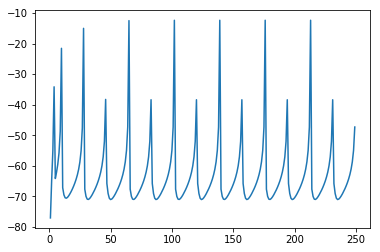

In [5]:
%matplotlib inline
import nest
import matplotlib.pyplot as plt

nest.set_verbosity("M_WARNING")
nest.ResetKernel()
nest.Install("nestmlmodule")

neuron = nest.Create("izhikevich_tutorial")
voltmeter = nest.Create("voltmeter")

nest.SetStatus(voltmeter, [{"withgid": True, "record_from" : [nest.GetStatus(neuron)[0]["recordables"][1]]}])
nest.Connect(voltmeter, neuron)

cgs = nest.Create('dc_generator')
nest.SetStatus(cgs, "amplitude", 25.)
nest.Connect(cgs, neuron)

nest.Simulate(250.)

plt.plot(nest.GetStatus(voltmeter)[0]["events"]["times"], nest.GetStatus(voltmeter)[0]["events"]["v"])
plt.show()

References
----------

[1] Eugene M. Izhikevich, "Simple Model of Spiking Neurons", IEEE Transactions on Neural Networks, Vol. 14, No. 6, November 2003